# Решающие деревья и градиентный бустинг
В этом задании мы подробнее познакомимся с решающими деревьями и их композициями.



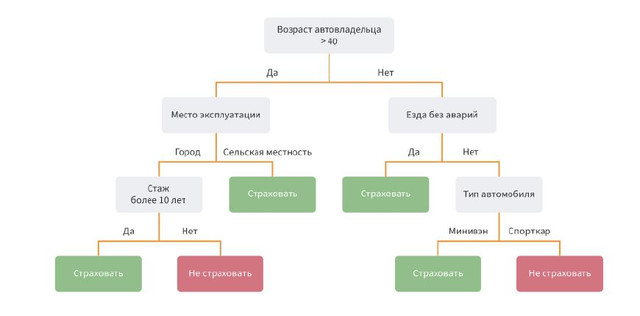

## Почему вам будет полезен этот семинар:
1. Вы поработаете с данными по недвижимости
2. Познакомитесь с более продвинутыми методами машинного обучения, которые сейчас применяются для многих практических задач
3. Узнаете, как происходит процесс настройки модели машинного обучения

Это поможет вам грамотнее управлять проектами по машинному обучению и лучше понимать их специфику.

Мы будем работать с набором данных Boston Houses, в котором __объектами__ являются __районы города__, __признаками__ - некие __социальные и географические характеристики__ района, а целевая переменная - медианная стоимость домов в районе, то есть мы будем решать __задачу регрессии__. Как и в предыдущем практическом задании, весь код, который мы пишем, можно применить к любым данным.

Описание признаков:
- crim_rate  - уровень криминальности в районе
- zn - доля участков площадью более 25000 кв футов
- business -    уровень развитости бизнеса в районе
- river - наличие реки в районе
- nit_oxiden -  концентрация оксидов азота в воздухе
- rooms -  среднее число комнат в домах района
- age -  процент домов, построенных до 1940 года
- dist - расстояние до центров занятости
- highways_index -  индекс доступности крупных дорог
- tax -  средняя ставка налога на имущество
- pup_per_teac - среднее число учеников на одного учителя
- lower - процент низкообеспеченного населения в районе
- target - медианная стоимость домов в районе (целевая переменная).


План занятия:
1. Разведочный анализ и подготовка данных
1. Решающие деревья и их композиции (обучение моделей, выполнение предсказаний, оценивание ошибки)

## Разведочный анализ и подготовка данных

Загрузим данные. Для чтения данных воспользуемся модулем `pandas`. Импортируем модуль (`as pd` - переименование модуля):

In [1]:
# Импортируем библиотеку pandas
import pandas as pd
import numpy as np

# Отключаем предупреждения
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

Вызываем функцию `read_excel` из модуля `pandas`:

In [2]:
# Загружаем данные, которые будем использовать
data = pd.read_excel("https://github.com/mbburova/data/raw/main/boston.xlsx")

Посмотрим на первые несколько объектов с помощью функции `head`:

In [3]:
# Выводим первые пять строчек таблицы
data.head()

,crim_rate,zn,business,river,nit_oxiden,rooms,age,dist,highways_index,tax,pup_per_teaс,lower,target
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Одна строка (объект) - это район Бостона. Столбцы задают характеристики района, такие как уровень криминальности (crim_rate), число учеников на одного учителя (pup_per_teac), среднее число комнат (rooms) и т. д. - подробное описание см. выше.

Последний столбец - это наша целевая переменная, медианная стоимость дома в районе. Мы решаем задачу регрессии.

Число объектов и число признаков можно узнать через метод shape:

In [4]:
data.shape

(506, 13)

Проведем небольшой разведочный анализ данных. Для начала выведем основные статистики по признакам:

In [5]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
crim_rate,506.0,3.593761,8.596783,0.00632,0.082045,0.25651,3.647423,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
business,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
river,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nit_oxiden,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rooms,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dist,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
highways_index,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


* Есть ли пропуски в данных?
* Одинаков ли масштаб столбцов?

Построим гистрограммы признаков:

In [6]:
# Служебная команда для построения графиков
%matplotlib inline

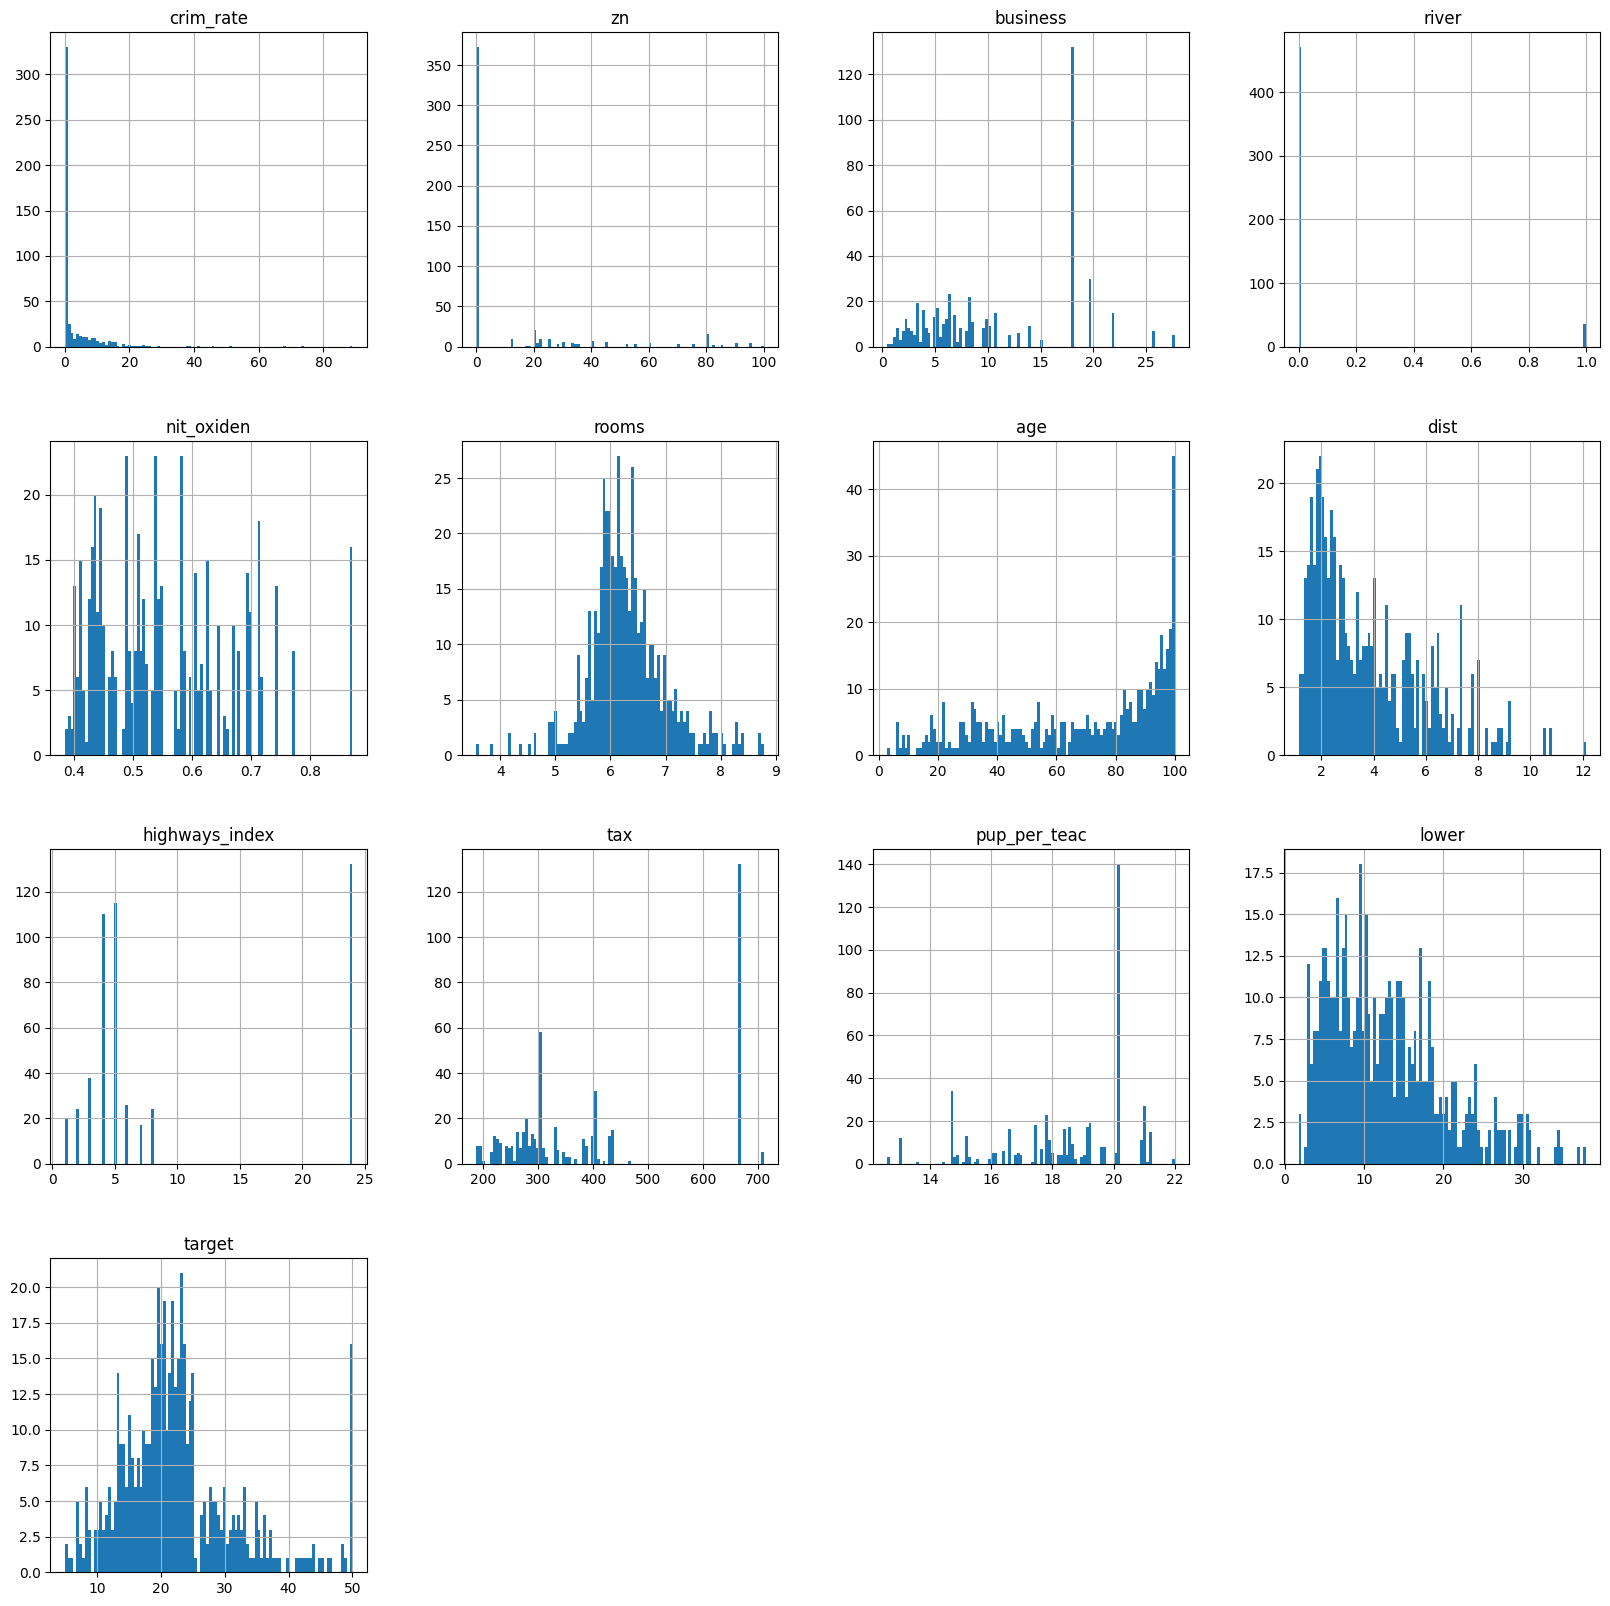

In [7]:
# Гистограммы с 100 интервалами
data.hist(figsize=(20, 20), bins=100)
pass

Никаких аномалий в данных не видно. У признака river низкий столбец "1", то есть районов с рекой мало. Вероятно, модели не смогут хорошо научиться распознавать влияние реки на стоимость домов из-за малого количества данных в этой области. Целевая переменная target достаточно симметрична. Если бы это было не так, можно было бы попробовать предсказывать преобразованную целевую переменную, например, ее логарифм, и, возможно, это бы позволило повысить качество предсказаний.

Часто также строят графики признак - целевой признак, перебирая разные признаки. Построим такие графики - поскольку строки в таблице не упорядочены, воспользуемся графиком scatter plot:

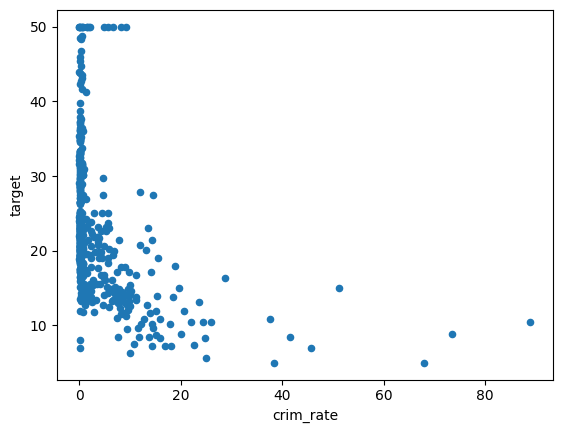

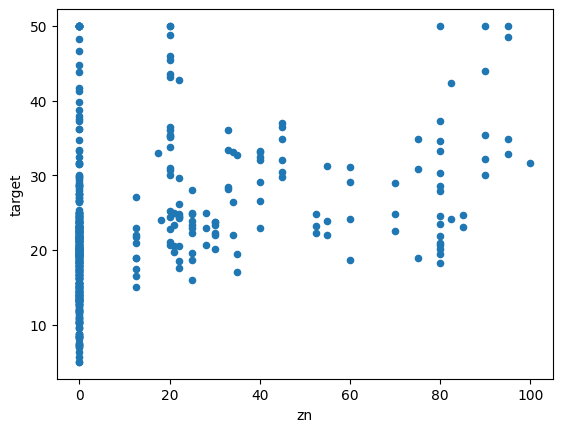

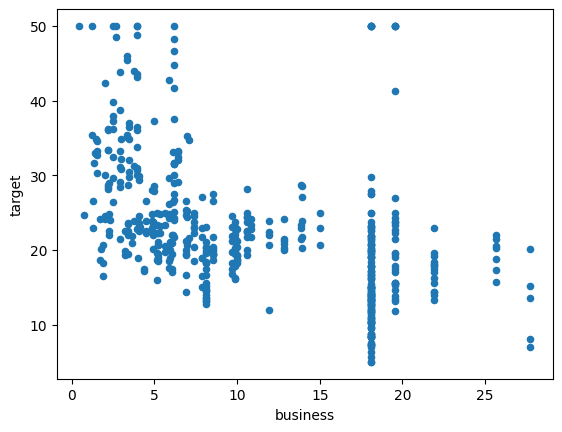

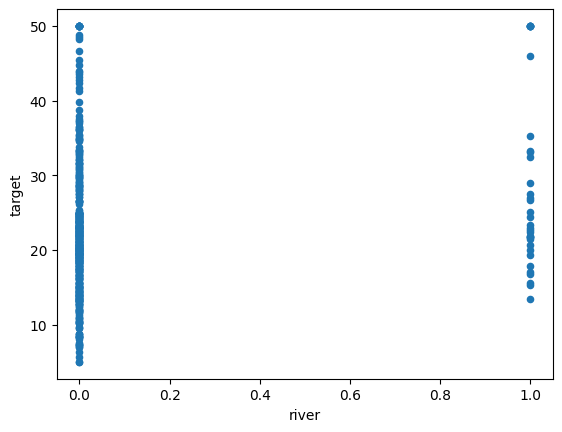

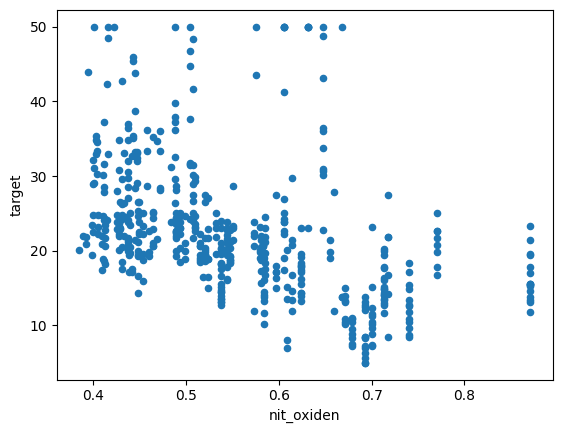

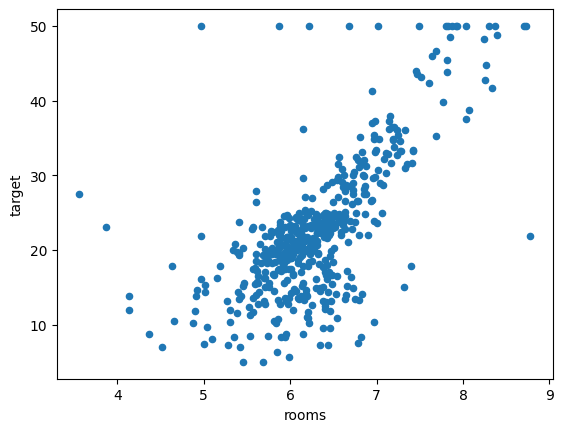

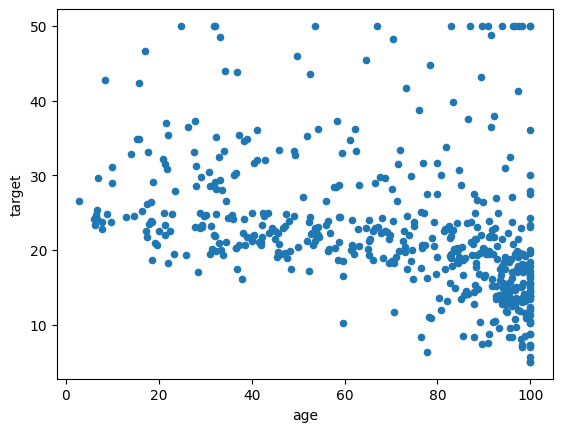

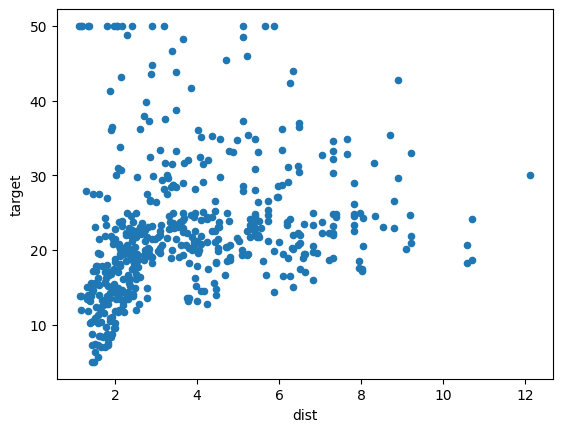

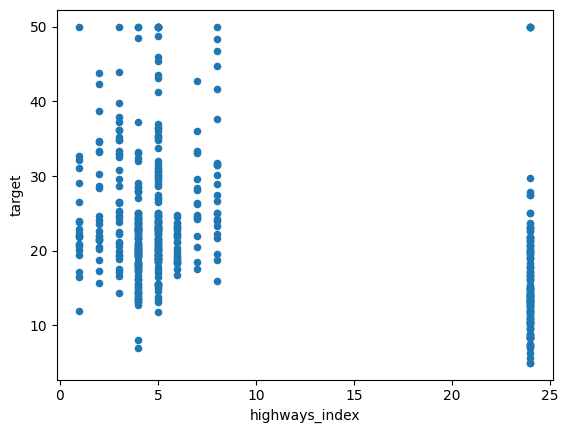

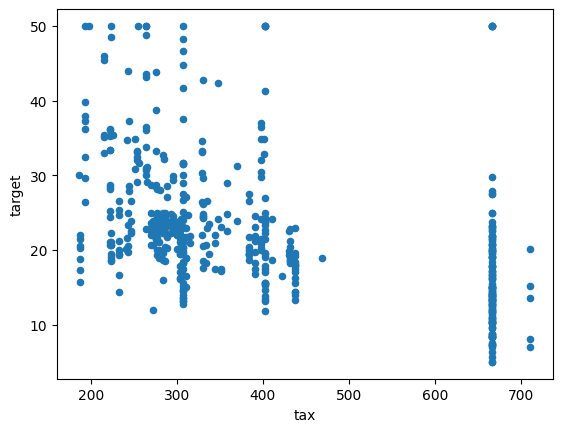

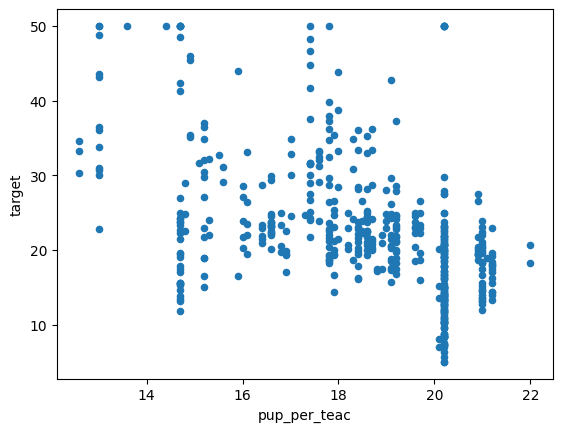

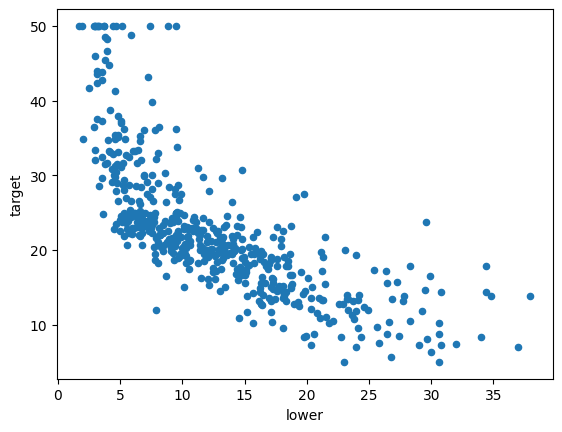

In [ ]:
for col in data.columns[:-1]:
    # Строим точечные диаграммы для всех признаков
    data.plot(kind="scatter", x=col, y="target")

Видна вполне линейная зависимость target от признаков nit_oxiden, rooms, tax, и нелинейная - от lower и dist. Гипотетически, если нужно применять именно линейные модели (например, в силу их интерпретируемости), можно было бы попробовать подобрать нелинейные функции от признаков lower и dist, "выпрямляющие" эти графики. Но, как мы увидим дальше, сложные нелинейные модели работают на наших данных лучше, чем линейные. Отметим, что не стоит искать в этих графиках слишком много - понять по ним, какие модели лучше использовать для конкретных данных, как правило, невозможно.

В итоге наша предобработка данных будет состоять из следующих шагов:
* отделение X и Y  
* деление данных на обучение и тест
* выполнение перемасштабирования данных.

In [8]:
X = data[data.columns[:-1]] # Определяем признаки
Y = data["target"] # Определеяем целевую переменную

Теперь у нас есть отдельно объекты, хранящиеся в переменной X, и отдельно целевые значения, хранящиеся в переменной y. Разделим данные на обучающую и тестовую части:

In [9]:
# Импортируем библиотеку для разделения выборки на тестовую и обучающую
from sklearn.model_selection import train_test_split

In [10]:
# Делим выборку на обучающую и тестовую в пропорции 70% к 30%
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

### Задача. Сколько объектов попало в обучение и в тест?

In [11]:
### Здесь ваш код
X_train.shape, X_test.shape

((354, 12), (152, 12))

## Построение линейной модели

В качестве базового решения обучим линейную модель. Импортируем ее и заодно метрику качества:

In [12]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error as mae # Основная метрика оценки качества наших моделей

Выполняем шаги обучения, предсказания и оценивания средней ошибки:

In [13]:
# Обучение
model = LinearRegression()
model.fit(X_train, Y_train)

# Предсказания
preds_train = model.predict(X_train)
preds_test = model.predict(X_test)

# Оценивание ошибки
print("Ошибка на обучении:", mae(Y_train, preds_train))
print("Ошибка на тесте:", mae(Y_test, preds_test))

Ошибка на обучении: 3.4585602219022653
Ошибка на тесте: 3.187011855820375


Ошибка на порядок меньше предсказываемой величины, что можно считать хорошим результатом. Однако в следующих заданиях мы будем стараться уменьшить эту ошибку.

## Модель Дерево решений

#### Задача. Построение решающего дерева

Повторите обучение-предсказание-оценивание качества для решающего дерева. Выведите ошибку на обеих выборках: обучающей и тестовой.

In [14]:
!pip install graphviz

In [15]:
from sklearn.tree import DecisionTreeRegressor, export_graphviz
import graphviz # Необходимо для визуализации

In [17]:
model_tree = DecisionTreeRegressor() ### Здесь ваш код
### Здесь ваш код

preds_train = model_tree.fit(X_train, Y_train).predict(X_train) ### Здесь ваш код
preds_test = model_tree.predict(X_test) ### Здесь ваш код

print("Ошибка на обучении:", mae(Y_train, preds_train))
print("Ошибка на тесте:", mae(Y_test, preds_test))

Ошибка на обучении: 0.0
Ошибка на тесте: 2.432894736842105


Сравните полученные значения ошибок с соответствующими ошибками для линейной модели. Какая из двух моделей является переобученной?

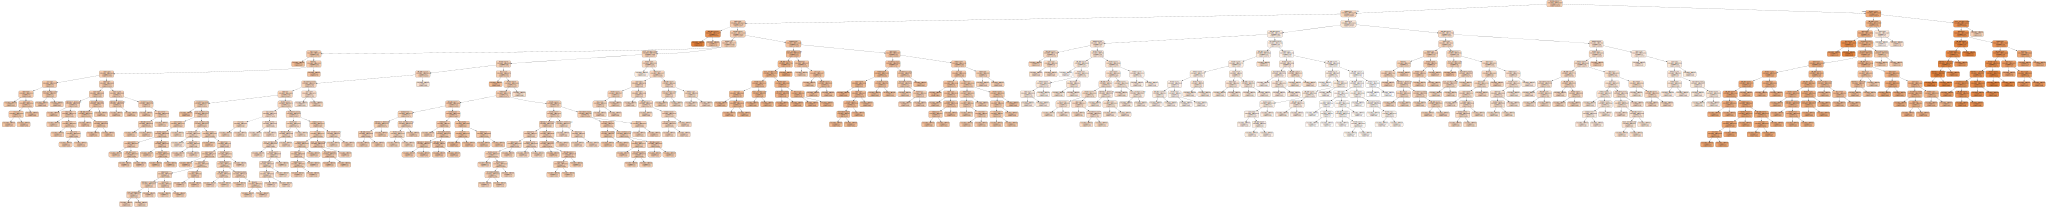

In [18]:
dot_data = export_graphviz(model_tree, feature_names=X.columns, filled=True, rounded=True, special_characters=True)
graphviz.Source(dot_data)

### Параметры и гиперпараметры модели

__Нашей целью__ при решении следующих задач будет попробовать различные алгоритмы машинного обучения на наших данных, и найти лучший алгоритм, а также лучшую его конфигурацию, то есть набор _гиперпараметров_ алгоритма.

__Гиперпараметрами__ называются величины, которые не настраиваются по обучающим данным в процессе обучения, и которые нужно задать до начала обучения алгоритма. Грамотный подбор гиперпараметров является одним из ключевых способов достижения хорошего уровня качества в машинном обучении. В задачах мы познакомимся с гиперпараметрами различных алгоритмов и с процедурами их подбора.

Начнем с решающих деревьев!

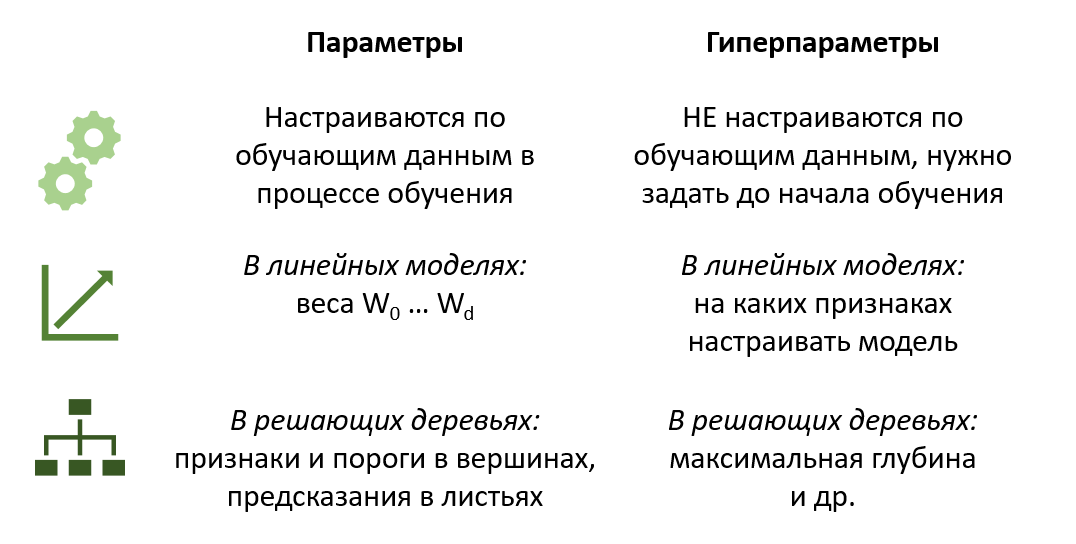

#### Бонус: Задача. Гиперпараметры решающего дерева

У решающих деревьев много гиперпараметров, ограничивающих их возможности запоминать обучающие данные и тем самым уменьшающих их переобучение. Одним из таких гиперпараметров является `max_depth` - максимальная глубина решающего дерева. Давайте попробуем несколько вариантов значений глубины и проследим динамику обучающей и тестовой ошибок.

Чтобы задать конкретную максимальную глубину X, укажите `max_depth=X` при создании модели. Попробуйте значения __1, 3, 5, 10, 20__, для каждого и повторите последовательность обучение-предсказание-оценивание качества.

_Упрощенная версия:_ скопируйте код несколько раз и поменяйте требуемое значение.

_Стандартная версия:_ используйте цикл.

In [20]:
for max_depth in [1, 3, 5, 10, 20, 40, 100]:

    model_tree = DecisionTreeRegressor(max_depth = max_depth)### Здесь ваш код
    model_tree.fit(X_train, Y_train) ### Здесь ваш код

    preds_train = model_tree.predict(X_train) ### Здесь ваш код
    preds_test = model_tree.predict(X_test) ### Здесь ваш код

    print("Глубина дерева:", max_depth)
    print("Ошибка на обучении:", mae(Y_train, preds_train))
    print("Ошибка на тесте:", mae(Y_test, preds_test))

Глубина дерева: 1
Ошибка на обучении: 5.106112579921159
Ошибка на тесте: 4.831093884457055
Глубина дерева: 3
Ошибка на обучении: 2.9830174921524066
Ошибка на тесте: 3.4432455671681637
Глубина дерева: 5
Ошибка на обучении: 1.9100045834854786
Ошибка на тесте: 2.4384029334200723
Глубина дерева: 10
Ошибка на обучении: 0.5002673440809035
Ошибка на тесте: 2.5352425936636465
Глубина дерева: 20
Ошибка на обучении: 0.0
Ошибка на тесте: 2.3776315789473683
Глубина дерева: 40
Ошибка на обучении: 0.0
Ошибка на тесте: 2.6960526315789473
Глубина дерева: 100
Ошибка на обучении: 0.0
Ошибка на тесте: 2.6677631578947367


Выберите наилучшее значение максимальной глубины. Нужно выбирать по значению средней ошибки на тестовой выборке - так, чтобы она была наименьшей.

Как правило, оптимальным получается значение где-то посередине: слишком большие значения приводят к переобучению (слишком сложное дерево запоминает обучающую выборку "наизусть"), слишком маленькие - к недообучению (слишком простое дерево не может извлечь зависимости из данных).

## Случайный лес

Решающие деревья сами по себе считаются слабым алгоритмом, однако если взять несколько решающих деревьев, то они будут "исправлять" ошибки друг друга, и все вместе достигнут хорошего качества. Такой подход называется _ансамбль_, и одним из его вариантов является алгоритм под названием случайный лес (Random Forest).



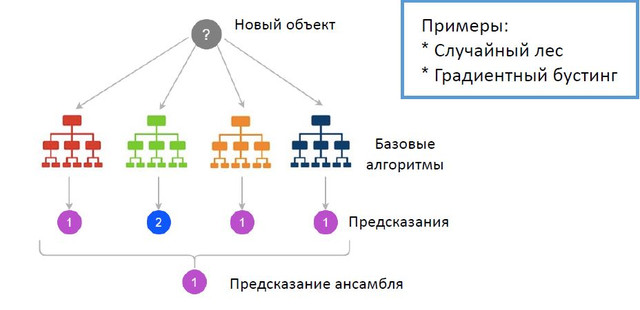

In [21]:
from sklearn.ensemble import RandomForestRegressor

In [22]:
model_rf = RandomForestRegressor(random_state=42) ### Здесь ваш код
model_rf.fit(X_train, Y_train)

preds_train =  model_rf.predict(X_train) ### Здесь ваш код
preds_test = model_rf.predict(X_test) ### Здесь ваш код

print("Ошибка на обучении:", mae(Y_train, preds_train))
print("Ошибка на тесте:", mae(Y_test, preds_test))

Ошибка на обучении: 0.9204378531073432
Ошибка на тесте: 2.0775000000000006


### Бонус: Задача. Подберите гиперпаметры для случайного леса

Обучите несколько случайных лесов с числом деревьев 3, 10, 100, 500 (всего 4 случайных леса). Задавать число деревьев можно так: `RandomForestRegressor(n_estimators=3)`. Используйте цикл или копирование кода.

In [23]:
for n_estimators in [3, 10, 100, 500]:

    model_rf = RandomForestRegressor(n_estimators=n_estimators) ### Здесь ваш код
    model_rf.fit(X_train, Y_train)### Здесь ваш код

    preds_train = model_rf.predict(X_train) ### Здесь ваш код
    preds_test = model_rf.predict(X_test) ### Здесь ваш код

    print("Число деревьев: ", n_estimators)
    print("Ошибка на обучении:", mae(Y_train, preds_train))
    print("Ошибка на тесте:", mae(Y_test, preds_test))
    print()

Число деревьев:  3
Ошибка на обучении: 1.2423728813559325
Ошибка на тесте: 2.571710526315789

Число деревьев:  10
Ошибка на обучении: 0.9789830508474575
Ошибка на тесте: 2.221118421052631

Число деревьев:  100
Ошибка на обучении: 0.9205423728813538
Ошибка на тесте: 2.077467105263158

Число деревьев:  500
Ошибка на обучении: 0.9224124293785365
Ошибка на тесте: 2.060448684210528



При каком числе деревьев в ансамбле достигается наименьшая тестовая ошибка?

###Бонус: Задача. Подбор максимальной глубины для случайного леса

В предыдущей задаче вы выбрали наилучшее значение числа деревьев в случайном лесе. Теперь подберите наилучшее значение максимальной глубины для случайного леса, используя выбранное число деревьев. Задать сразу два гиперпараметра можно так: `RandomForestRegressor(max_depth=1, n_estimators=1)`

In [24]:
for max_depth in [5, 10, 100, 500, None]:

    model_rf = RandomForestRegressor(
        max_depth=max_depth, n_estimators=500
        ) ### Здесь ваш код
    model_rf.fit(X_train, Y_train) ### Здесь ваш код
    preds_train = model_rf.predict(X_train)### Здесь ваш код
    preds_test = model_rf.predict(X_test) ### Здесь ваш код

    print("Mаксимальная глубина: ", max_depth)
    print("Ошибка на обучении:", mae(Y_train, preds_train))
    print("Ошибка на тесте:", mae(Y_test, preds_test))
    print()

Mаксимальная глубина:  5
Ошибка на обучении: 1.7598618429765696
Ошибка на тесте: 2.23686889447943

Mаксимальная глубина:  10
Ошибка на обучении: 1.0256183802185548
Ошибка на тесте: 2.071408548856862

Mаксимальная глубина:  100
Ошибка на обучении: 0.9002711864406798
Ошибка на тесте: 2.0458026315789466

Mаксимальная глубина:  500
Ошибка на обучении: 0.908379096045198
Ошибка на тесте: 2.0572157894736858

Mаксимальная глубина:  None
Ошибка на обучении: 0.9154870056497197
Ошибка на тесте: 2.0549105263157905



## Градиентный бустинг

Главное отличие бустинга от случайного леса в том, что деревья в этом алгоритме строятся последовательно, и каждое следующее дерево исправляет ошибки предыдущего.

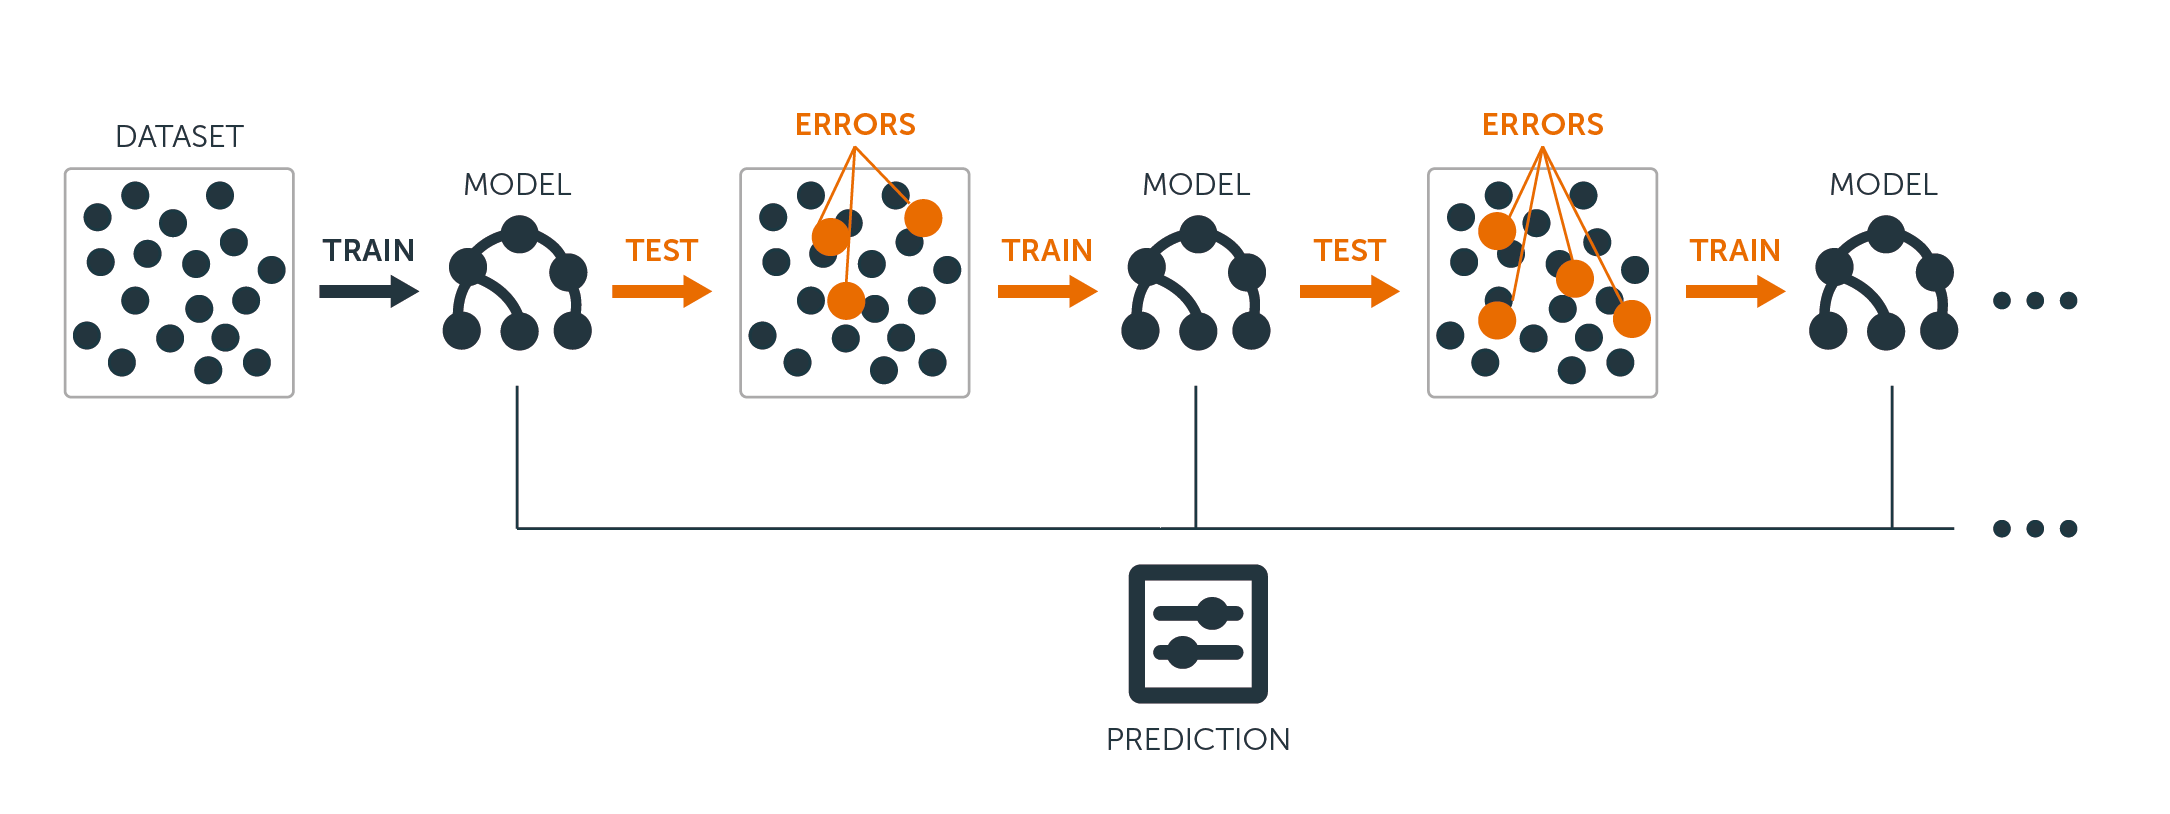

In [25]:
from sklearn.ensemble import GradientBoostingRegressor

In [26]:
model_boosting = GradientBoostingRegressor() ### Здесь ваш код
model_boosting.fit(X_train, Y_train)

preds_train = model_boosting.predict(X_train) ### Здесь ваш код
preds_test = model_boosting.predict(X_test) ### Здесь ваш код

print("Ошибка на обучении:", mae(Y_train, preds_train))
print("Ошибка на тесте:", mae(Y_test, preds_test))

Ошибка на обучении: 1.1234213849060064
Ошибка на тесте: 2.0779740682696626


Ошибка выросла, но давайте попробуем подобрать параметры у модели, чтобы объективнее сравнить ее со случайным лесом.

In [28]:
best_error_train = np.inf
best_error_test = np.inf
best_n_estimators = ''
best_max_depth = ''

for n_estimators in [3, 10, 100, 500]:
    for max_depth in [5, 10, 100, 500, None]:
        model_boosting = GradientBoostingRegressor(n_estimators=n_estimators, max_depth=max_depth)
        model_boosting.fit(X_train, Y_train)

        preds_train = model_boosting.predict(X_train)
        preds_test = model_boosting.predict(X_test)

        train_error = mae(Y_train, preds_train)
        test_error = mae(Y_test, preds_test)

        if test_error < best_error_test:
            best_error_train = train_error
            best_error_test = test_error
            best_n_estimators = n_estimators
            best_max_depth = max_depth

In [29]:
print("Число деревьев", best_n_estimators, "; Глубина дерева:", best_max_depth)
print("Ошибка на обучении:", best_error_train)
print("Ошибка на тесте:", best_error_test)

Число деревьев 500 ; Глубина дерева: 5
Ошибка на обучении: 0.005227599327585338
Ошибка на тесте: 1.9759810135324667


Нам удалось подобрать подобрать параметры так, чтобы наша ошибка была меньше, чем при использовании случайного леса!

### XGBoost

**XGBoost** - одна из самых популярных реализаций градиентного бустинга. В данной реализации есть минимальные отличия от классического градиентного бустинга, например, он используем сбалансированные деревья и добавляет в функцию потерь штраф за деревья со слишком большим количеством листьев.

In [30]:
from xgboost import XGBRegressor

In [31]:
model_xgb = XGBRegressor() ### Здесь ваш код
model_xgb.fit(X_train, Y_train)

preds_train = model_xgb.predict(X_train) ### Здесь ваш код
preds_test = model_xgb.predict(X_test) ### Здесь ваш код


print("Ошибка на обучении:", mae(Y_train, preds_train))
print("Ошибка на тесте:", mae(Y_test, preds_test))

Ошибка на обучении: 0.008654165537343841
Ошибка на тесте: 2.073996763480337


Данная модификация помогла незначительно снизить ошибку при использовании модели без подбора гиперпараметров. Давайте попробуем также подобрать параметры для XGBoost

In [33]:
best_error_train = np.inf
best_error_test = np.inf
best_n_estimators = ''
best_max_depth = ''

for n_estimators in [3, 10, 100, 500]:
    for max_depth in [5, 10, 100, 500, None]:
        model_xgb = XGBRegressor(n_estimators=n_estimators, max_depth=max_depth)
        model_xgb.fit(X_train, Y_train)

        preds_train = model_xgb.predict(X_train)
        preds_test = model_xgb.predict(X_test)

        train_error = mae(Y_train, preds_train)
        test_error = mae(Y_test, preds_test)

        if test_error < best_error_test:
            best_error_train = train_error
            best_error_test = test_error
            best_n_estimators = n_estimators
            best_max_depth = max_depth

In [34]:
print("Число деревьев", best_n_estimators, "; Глубина дерева:", best_max_depth)
print("Ошибка на обучении:", best_error_train)
print("Ошибка на тесте:", best_error_test)

Число деревьев 500 ; Глубина дерева: None
Ошибка на обучении: 0.0008115596016921004
Ошибка на тесте: 2.0737734342876233


К сожалению, на данном датасете XGBoost заработал хуже, хоть и работал намного быстрее. Обычно при более детальном подборе параметров разница между ошибками классического бустинга и XGBoost намного меньше.

Давайте попробуем обучить более совершенную версию бустинга.

### CatBoost

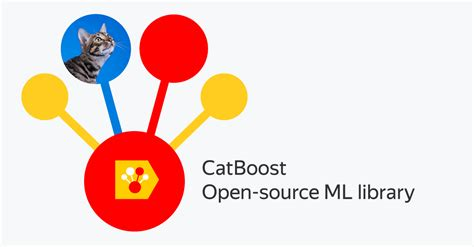

CatBoost - библиотека, содержащая модификацию модели градиентного бустинга от компании Яндекс. Основная особенность алгоритма - возможность эффективно обрабатывать категориальные переменные. Сейчас этот алгоритм считается одним из самых лучших решений для табличных данных!

In [35]:
! pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 2.3 MB/s eta 0:00:00


In [36]:
import catboost
from catboost import CatBoostRegressor

In [37]:
model_catboost = CatBoostRegressor(verbose=0) ### Здесь ваш код
model_catboost.fit(X_train, Y_train)

preds_train = model_catboost.predict(X_train) ### Здесь ваш код
preds_test = model_catboost.predict(X_test) ### Здесь ваш код

print("Ошибка на обучении:", mae(Y_train, preds_train))
print("Ошибка на тесте:", mae(Y_test, preds_test))

Ошибка на обучении: 0.4591763627595577
Ошибка на тесте: 1.8714731175344774


Ошибка на тесте значительно снизилась!

А теперь давайте отдельно укажем модели, какие переменные являются категориальными, чтобы полностью раскрыть эффективность алгоритма

In [38]:
model_catboost = CatBoostRegressor(verbose=0) ### Здесь ваш код
model_catboost.fit(X_train, Y_train, cat_features=['river'])

preds_train = model_catboost.predict(X_train) ### Здесь ваш код
preds_test = model_catboost.predict(X_test) ### Здесь ваш код

print("Ошибка на обучении:", mae(Y_train, preds_train))
print("Ошибка на тесте:", mae(Y_test, preds_test))

Ошибка на обучении: 0.43635127146696717
Ошибка на тесте: 1.8695460855927069


Ошибка модели снизилась, но не значительно. Тем не менее, при работе с CatBoost рекомендуем всегда указывать категориальные переменные.

#### Бонус: Задача. Подбор гиперпараметров с помощью кросс-валидации

Итак, мы попробовали использовать одно решающее дерево и выяснили, что это довольно слабый алгоритм, даже если перебрать гиперпараметры. Также мы попробовали применить ансамбль решающих деревьев и убедились, что это, наоборот, довольно сильный алгоритм, который достигает достаточно низкого значения ошибки, особенно если подобрать его гиперпараметры.

Однако, мы подбирали гиперпараметры по ошибке на тестовой выборке, что не совсем корректно: может оказаться, что подобранные гиперпараметры хорошо работают только на текущей тестовой выборке, а на других данных будут работать плохо. Гораздо более правильным способом подбора гиперпараметров является метод __кросс-валидации__, когда для каждой конфигурации гиперпараметров обучается несколько моделей на нескольких подвыборках, а затем показатели ошибки усредняются. Попробуем использовать такой метод.

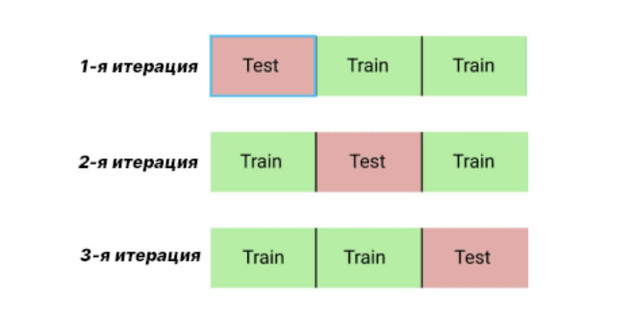

Один из вариантов реализации кросс-валидации в sklearn - функция `cross_val_score`. Пример использования функции:

In [39]:
from sklearn.model_selection import cross_val_score

In [44]:
model = DecisionTreeRegressor()
cross_val_score(model, X_train, Y_train,
                cv=3, # Число сплитов, на которые делится выборка.
                scoring='neg_mean_absolute_error' # Указываем, какую мы хотим вычислять метрику.
            )


array([-3.83135593, -3.46186441, -3.37881356])

При выполнении ячейки данные `X_train, Y_train` разделились на 3 части (т. к. cv=3), 3 раза было выполнено обучение на разных подвыборках и 3 раза измерена ошибка. Соответственно, нам выводятся три полученных значения ошибки.

Мы можем вычислить среднюю ошибку, используя функцию `numpy.mean`:

In [42]:
import numpy as np

In [43]:
model = DecisionTreeRegressor()
errors = cross_val_score(model, X_train, Y_train, cv=3, scoring='neg_mean_absolute_error')
print("Средняя ошибка:", -np.mean(errors))

Средняя ошибка: 3.4454802259887


__Задание:__ Примените кросс-валидацию к `GradientBoostingRegressor`. Рассмотрите значения `max_depth` __1, 3, 10__ и значения `n_estimators` __5, 20, 100__. Запишите два вложенных цикла (по каждому из гиперпараметров), на каждом шаге цикла создайте модель с текущими гиперпараметрами, примените кросс-валидацию, как в примере выше, и напечатайте текущие гиперпараметры и среднюю ошибку. __Выберите набор__ с минимальным значением ошибки (посмотрев визуально или написав соответствующий код).

In [46]:
best_error_test = np.inf
best_max_depth = ''
best_n_estimators = ''

for max_depth in [1, 3, 10]:
    for n_estimators in [5, 20, 100, 1000]:
        model = GradientBoostingRegressor(max_depth = max_depth, n_estimators = n_estimators) ### Здесь ваш код
        errors = cross_val_score(model, X_train, Y_train, cv=5, scoring = 'neg_mean_absolute_error') ### Здесь ваш код

        print(f'Максимальная глубина - {max_depth}')
        print(f'Количество базовых моделей - {n_estimators}')
        print(f'Средняя ошибка - {-np.mean(errors)}\n')
        if np.abs(np.mean(errors)) < best_error_test:
            best_max_depth = max_depth
            best_n_estimators = n_estimators
            best_error_test = np.abs(np.mean(errors))
print(f'Лучшая максимальная глубина - {best_max_depth}')
print(f'Лучшее количество базовых моделей - {best_n_estimators}')
print(f'Минимальна средняя ошибка - {best_error_test}\n')

Максимальная глубина - 1
Количество базовых моделей - 5
Средняя ошибка - 5.588895010362002

Максимальная глубина - 1
Количество базовых моделей - 20
Средняя ошибка - 3.9108655260274565

Максимальная глубина - 1
Количество базовых моделей - 100
Средняя ошибка - 2.9507575005919557

Максимальная глубина - 1
Количество базовых моделей - 1000
Средняя ошибка - 2.841604611322444

Максимальная глубина - 3
Количество базовых моделей - 5
Средняя ошибка - 4.900472519647392

Максимальная глубина - 3
Количество базовых моделей - 20
Средняя ошибка - 2.8496859743769116

Максимальная глубина - 3
Количество базовых моделей - 100
Средняя ошибка - 2.3626871590067315

Максимальная глубина - 3
Количество базовых моделей - 1000
Средняя ошибка - 2.3487734416137003

Максимальная глубина - 10
Количество базовых моделей - 5
Средняя ошибка - 4.65885795985854

Максимальная глубина - 10
Количество базовых моделей - 20
Средняя ошибка - 3.0545180988680363

Максимальная глубина - 10
Количество базовых моделей - 100
С

__Продолжение задания:__ Обучите `GradientBoostingRegressor` с выбранными гиперпараметрами на всей обучающей выборке, выполните предсказания для _тестовой_ выборки и выведите значение метрики mean_absolute_error.

In [47]:
### Здесь ваш код
model = GradientBoostingRegressor(max_depth = 3, n_estimators = 1000)
model.fit(X_train, Y_train)

preds_train = model.predict(X_train)
preds_test = model.predict(X_test)


print("Ошибка на обучении:", mae(Y_train, preds_train))
print("Ошибка на тесте:", mae(Y_test, preds_test))

Ошибка на обучении: 0.03868787591366036
Ошибка на тесте: 1.9953397597765095


Обратите внимание, что в процессе подбора гиперпараметров мы не использовали тестовую выборку, так что полученное значение ошибки является максимально честным!

## Итоги

Итак, мы применили решающие деревья и ансамбли решающих деревьев и получили следующие выводы:
* Предсказания решающих деревьев имеют большую ошибку, однако ансамбль решающих деревьев позволяет достичь высокого качества (низкую ошибку). Как правило, при работе с табличными данными на практике используют именно ансамбли решающих деревьев.
* Повысить качество ансамбля можно и нужно с помощью подбора его гиперпараметров. Наиболее честно подбирать гиперпараметры, используя кросс-валидацию, и затем оценивая качество модели с подобранными гиперпараметрами на тестовой выборке. При этом важно, что тестовая выборка используется как можно меньшее количество раз.
* При этом у ансамблей есть недостатки - слабая интерпретируемость и относительно медленная работа. Если эти два показателя являются приоритетными, то на практике обычно используют линейные модели.
* Catboost - одна из наилучших моделей градиентного бустинга на данный момент

## Дополнительный материал повышенной сложности. Подбор гиперпараметров с помощью кросс-валидации v2

Кросс-валидация в sklearn также реализована в GridSearchCV. Это более высокоуровневая реализация: в ней не нужно писать циклы по гиперпараметрам и вообще нужно писать меньше кода. Поэтому ее чаще используют на практике. Попробуем ей воспользоваться.

In [48]:
from sklearn.model_selection import GridSearchCV

Пример использования кросс-валидации для линейной модели:

In [49]:
# Модель, для которой будет выполняться кросс-валидация.
model_for_gs = LinearRegression()

# Какие варианты гиперпараметров нужно рассмотреть.
params = {
    "fit_intercept": [True, False],
     # Можно указывать сразу несколько гиперпараметров и их вариантов.
}

# Инициализируем кросс-валидацию.
gs = GridSearchCV(model_for_gs,
                  params,
                  cv=3,
                  scoring='neg_mean_absolute_error',
                  verbose=5 # Печатать все промежуточные результаты.
                 )

# Выполнение кросс-валидации - стандартный вызов функции fit.
gs.fit(X_train, Y_train)

print("Лучшие гиперпараметры:", gs.best_params_)
print("Лучшее значение метрики:", -gs.best_score_)
# знак "-" нужен потому, что GridSearchCV ищет максимальное значение метрики,
# поэтому функция сама добавляет минус к найденной метрике.

Fitting 3 folds for each of 2 candidates, totalling 6 fits
[CV 1/3] END ...............fit_intercept=True;, score=-3.758 total time=   0.0s
[CV 2/3] END ...............fit_intercept=True;, score=-3.649 total time=   0.0s
[CV 3/3] END ...............fit_intercept=True;, score=-3.416 total time=   0.0s
[CV 1/3] END ..............fit_intercept=False;, score=-3.691 total time=   0.0s
[CV 2/3] END ..............fit_intercept=False;, score=-3.730 total time=   0.0s
[CV 3/3] END ..............fit_intercept=False;, score=-3.573 total time=   0.0s
Лучшие гиперпараметры: {'fit_intercept': True}
Лучшее значение метрики: 3.6074947386761465


В процессе печатаются промежуточные результаты: для каждой комбинации гиперпараметров - значения метрики качества для трех запусков модели (так как мы запросили 3 блока в кросс-валидации, `cv=3`).

__Задание:__ Примените кросс валидацию к `GradientBoostingRegressor`. Рассмотрите значения `max_depth` __1, 3, 10__ и значения `n_estimators` __5, 20, 100__.

In [50]:
model_for_gs = GradientBoostingRegressor()
params = {
    'max_depth': [1, 3, 10],
    'n_estimators': [5, 20, 100]
}

gs = GridSearchCV(model_for_gs, params, cv=3, scoring='neg_mean_absolute_error', verbose=5)

gs.fit(X_train, Y_train)

print("Лучшие гиперпараметры:", gs.best_params_)
print("Лучшее значение метрики:", -gs.best_score_)

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV 1/3] END ......max_depth=1, n_estimators=5;, score=-5.504 total time=   0.0s
[CV 2/3] END ......max_depth=1, n_estimators=5;, score=-6.315 total time=   0.0s
[CV 3/3] END ......max_depth=1, n_estimators=5;, score=-4.898 total time=   0.0s
[CV 1/3] END .....max_depth=1, n_estimators=20;, score=-3.692 total time=   0.0s
[CV 2/3] END .....max_depth=1, n_estimators=20;, score=-4.405 total time=   0.0s
[CV 3/3] END .....max_depth=1, n_estimators=20;, score=-3.643 total time=   0.0s
[CV 1/3] END ....max_depth=1, n_estimators=100;, score=-2.695 total time=   0.1s
[CV 2/3] END ....max_depth=1, n_estimators=100;, score=-3.138 total time=   0.1s
[CV 3/3] END ....max_depth=1, n_estimators=100;, score=-2.829 total time=   0.1s
[CV 1/3] END ......max_depth=3, n_estimators=5;, score=-4.862 total time=   0.0s
[CV 2/3] END ......max_depth=3, n_estimators=5;, score=-5.560 total time=   0.0s
[CV 3/3] END ......max_depth=3, n_estimators=5;, 

__Продолжение задания:__ После подбора гиперпараметров GridSearchCV обучил модель с выбранными гиперпараметрами на всей обучающей выборке. Полученная _уже обученная_ модель хранится в переменной `gs.best_estimator_`. Выполните предсказания этой модели на _тестовой_ выборке и выведите среднюю ошибку.

In [52]:
### Здесь ваш код
preds_train = gs.best_estimator_.predict(X_train)
preds_test = gs.best_estimator_.predict(X_test)


print("Ошибка на обучении:", mae(Y_train, preds_train))
print("Ошибка на тесте:", mae(Y_test, preds_test))

Ошибка на обучении: 1.1234213849060066
Ошибка на тесте: 2.087289490653543


### Бонус: Подбор параметров в CatBoost

В библиотеке `CatBoost` есть внутренний механизм подбора параметров, похожий на `GridSearchCV` в sklearn. Давайте попробуем подобрать параметры для `CatBoostRegressor`.

In [53]:
model_catboost = CatBoostRegressor(verbose=0)

grid = {
    'iterations': [5, 20, 100, None],
    'depth': [1, 3, 10, None],
}

grid_search_result = model_catboost.grid_search(grid, X=X_train, y=Y_train, plot=False)


bestTest = 20.52516445
bestIteration = 4

0:	loss: 20.5251644	best: 20.5251644 (0)	total: 12.2ms	remaining: 183ms

bestTest = 13.71442256
bestIteration = 19

1:	loss: 13.7144226	best: 13.7144226 (1)	total: 17.7ms	remaining: 124ms

bestTest = 3.796178964
bestIteration = 99

2:	loss: 3.7961790	best: 3.7961790 (2)	total: 38.4ms	remaining: 167ms

bestTest = 20.63191756
bestIteration = 4

3:	loss: 20.6319176	best: 3.7961790 (2)	total: 43.4ms	remaining: 130ms

bestTest = 13.92791764
bestIteration = 19

4:	loss: 13.9279176	best: 3.7961790 (2)	total: 55.7ms	remaining: 123ms

bestTest = 3.356032634
bestIteration = 99

5:	loss: 3.3560326	best: 3.3560326 (5)	total: 115ms	remaining: 191ms

bestTest = 21.39287006
bestIteration = 4

6:	loss: 21.3928701	best: 3.3560326 (5)	total: 181ms	remaining: 233ms

bestTest = 16.06139566
bestIteration = 19

7:	loss: 16.0613957	best: 3.3560326 (5)	total: 484ms	remaining: 484ms

bestTest = 5.605209768
bestIteration = 99

8:	loss: 5.6052098	best: 3.3560326 (5)	tot

In [54]:
preds_train = model_catboost.predict(X_train) ### Здесь ваш код
preds_test = model_catboost.predict(X_test) ### Здесь ваш код

print("Ошибка на обучении:", mae(Y_train, preds_train))
print("Ошибка на тесте:", mae(Y_test, preds_test))

Ошибка на обучении: 1.4458806405145312
Ошибка на тесте: 1.9249295101434225


Ошибка получилась чуть больше, чем без подбора параметров. Модель могла переобучиться под тренировочную выборку, поэтому метрика чуть выросла.